In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [151]:
p = 0.1
def p011l001(Ncb, N001, N011, N101, N111):
    L =  400
    return (1-p)*1/L * (L - Ncb - N001)

def p111l001(Ncb, N001, N011, N101, N111):
    L =  400
    return (1-p)*1/L * (Ncb  + N001) * 1/(L**2) * (L - N101 - N111) * (L - N101)

def p001l011(Ncb, N001, N011, N101, N111):
    L =  400
    return (1-p)*1/L * (Ncb + N001) * 1/(L**2) * (N111 + N101)*(N101) + p

def p101l111(Ncb, N001, N011, N101, N111):
    L =  400
    #return (1-p)*1/L * N101 * 1/(L**2) * (Ncb + N001 + N011)*(Ncb + N001) + p
    return (1-p)*1/(L**2) * (Ncb + N001 + N011)*(Ncb + N001) + p


def p111l101(Ncb, N001, N011, N101, N111):
    L =  400
    '''
    Jeg har lyst til at rette den til den udkommenterede da det at skulle sige at P afh;nger om der er tomt foran
    samt at der er fyldt i inderbanen. Fitter bare bedre med den gamle... Træls
    '''
    return (1-p)*1/L * (L - N101) * 1/(L**2)*(Ncb + N001 + N011)*(Ncb + N001)
    #return (1-p)*1/L * (L - N101) * 1/(L**2)*(L - Ncb - N001 - N011)*(L - Ncb - N001)


def p011l111(Ncb, N001, N011, N101, N111):
    L =  400
    return (1-p)*1/(L**2)*(L - N001 - N011 - Ncb)*(L - Ncb - N001)

def p111l011(Ncb, N001, N011, N101, N111):
    L = 400
    return (1-p)*1/L*(Ncb + N001)*1/(L**2) *(L-N101) * (L-N101 - N111) + p*N011*(N101+N111)*(N101)*1/(L**2)

def p011l101(Ncb, N001, N011, N101, N111):
    L = 400
    return (1-p)*1/(L**2) *(L-Ncb - N001 - N011)*(L-Ncb - N001)


In [152]:
def p111l111(Ncb, N001, N011, N101, N111):
    return 1 - p011l111(Ncb, N001, N011, N101, N111) - p101l111(Ncb, N001, N011, N101, N111)
    
    
def p101l101(Ncb, N001, N011, N101, N111):
    return 1 - p011l101(Ncb, N001, N011, N101, N111) - p111l101(Ncb, N001, N011, N101, N111)
    
    
def p001l001(Ncb, N001, N011, N101, N111):
    return 1 - p111l011(Ncb, N001, N011, N101, N111) - p001l011(Ncb, N001, N011, N101, N111)
    
    
def p011l011(Ncb, N001, N011, N101, N111):
    return 1 -p111l011(Ncb, N001, N011, N101, N111) - p001l011(Ncb, N001, N011, N101, N111) 

In [153]:
def dN101(Ncb, N001, N011, N101, N111):
    pos =  p101l111(Ncb, N001, N011, N101, N111)*N111
    neg =  p111l101(Ncb, N001, N011, N101, N111)*N101 + p011l101(Ncb, N001, N011, N101, N111)*N101
    return pos - neg

def dN111(Ncb, N001, N011, N101, N111):
    pos = p111l101(Ncb, N001, N011, N101, N111)*N101 + p111l011(Ncb, N001, N011, N101, N111)*N011 + p111l001(Ncb, N001, N011, N101, N111)*N001
    neg = p101l111(Ncb, N001, N011, N101, N111)*N111 + p011l111(Ncb, N001, N011, N101, N111)*N111 
    return pos - neg
    
def dN001(Ncb, N001, N011, N101, N111):
    pos = p001l011(Ncb, N001, N011, N101, N111)*N011
    neg = p011l001(Ncb, N001, N011, N101, N111)*N001 + p111l001(Ncb, N001, N011, N101, N111)*N001
    return pos - neg

def dN011(Ncb, N001, N011, N101, N111):
    pos = p011l111(Ncb, N001, N011, N101, N111)*N111 + p011l001(Ncb, N001, N011, N101, N111)*N001 + p011l101(Ncb, N001, N011, N101, N111)*N101  
    neg = p111l011(Ncb, N001, N011, N101, N111)*N011 + p001l011(Ncb, N001, N011, N101, N111)*N011
    return pos - neg

In [162]:

Ncb = 70
N001 = 0
N011 = 80
N101 = 0
N111 = 20
if np.sum([N001,N011,N101,N111, Ncb]) > 2*400:
    print('bad times for malthe')
    
    

N001_ = []
N011_ = []
N101_ = []
N111_ = []

for i in range(50):
    d001 = dN001(Ncb, N001, N011, N101, N111)
    d011 = dN011(Ncb, N001, N011, N101, N111)
    d101 = dN101(Ncb, N001, N011, N101, N111)
    d111 = dN111(Ncb, N001, N011, N101, N111)
    
    N001_.append(N001)
    N011_.append(N011)
    N101_.append(N101)
    N111_.append(N111)
    
    
    
    N001 += d001
    N011 += d011
    N101 += d101
    N111 += d111
    
    

7.481483950829681 66.16666341054142 6.216383982708898 20.135468655919965
99.99999999999997


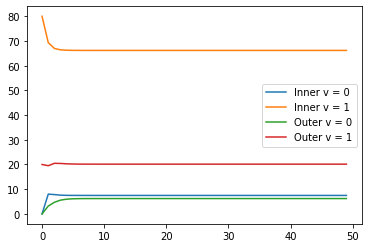

In [163]:
plt.plot(N001_, label = 'Inner v = 0')
plt.plot(N011_, label = 'Inner v = 1')
plt.plot(N101_, label = 'Outer v = 0')
plt.plot(N111_, label = 'Outer v = 1')
print(N001, N011, N101, N111)
print(sum([N001, N011, N101, N111]))
plt.legend()
plt.show()

In [156]:
def congestion(Ncb):
    Ncb += 0
    N001 = 0
    N011 = 80
    N101 = 20
    N111 = 0
    if np.sum([Ncb,N001,N011,N101,N111]) > 2*400:
        print('bad times for malthe')
        
        
    
    N001_ = []
    N011_ = []
    N101_ = []
    N111_ = []
    
    for i in range(1000):
        d001 = dN001(Ncb, N001, N011, N101, N111)
        d011 = dN011(Ncb, N001, N011, N101, N111)
        d101 = dN101(Ncb, N001, N011, N101, N111)
        d111 = dN111(Ncb, N001, N011, N101, N111)
        
        N001_.append(N001)
        N011_.append(N011)
        N101_.append(N101)
        N111_.append(N111)
        
        
        
        N001 += d001
        N011 += d011
        N101 += d101
        N111 += d111
    
#     print(N001 + N011 + Ncb)
#     print(N101 + N111)
#     print(10 + Ncb)
#     print('===============')
    
    return N001 + N011, N101 + N111, N011/(N001+N011+Ncb),N111/(N111+N101)
    
    

In [157]:
speed_i = []
speed_o = []
inn = []
inn_corrected = []
out = []
out_corrected = []
for i in range(1,300):
    inner, outer, speed_inner, speed_outer = congestion(i)
    speed_i.append(speed_inner)
    speed_o.append(speed_outer)
    inn.append(inner/400)
    out.append(outer/400)
    inn_corrected.append((i+inner)/400)
    out_corrected.append((-i+outer)/400)
    

    #plt.scatter(i,i, color = 'blue')


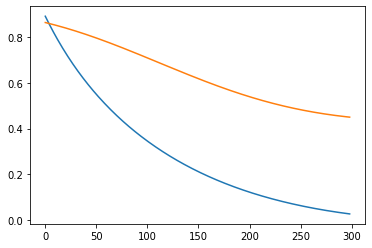

In [158]:
plt.plot(speed_i)
plt.plot(speed_o)

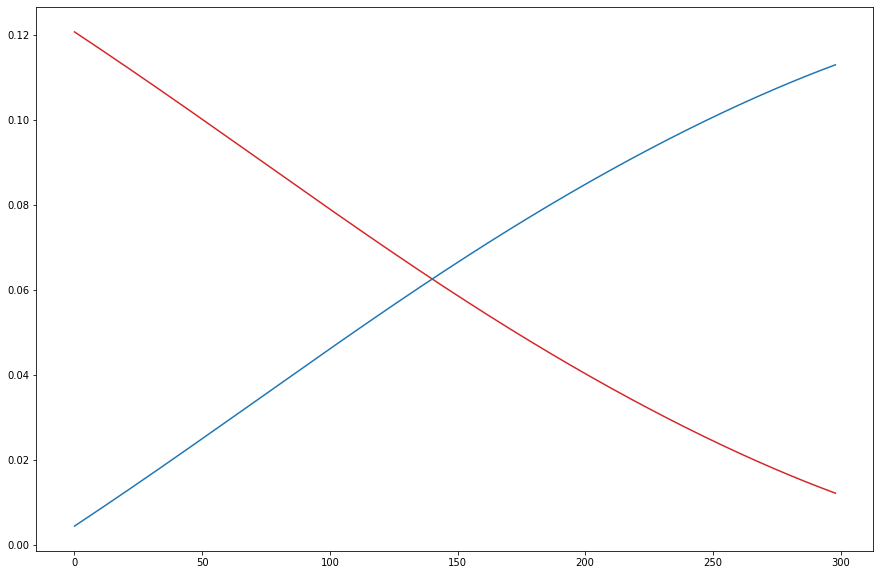

In [159]:
fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.plot(np.array(inn)/2, color = 'tab:red')
ax.plot(np.array(out)/2, color = 'tab:blue')
#ax.plot(inn_corrected, color = 'tab:green')
#ax.plot(out_corrected, color = 'limegreen')
#ax.plot(speed_i, color = 'black')
#ax.plot(speed_o, color = 'teal')
plt.show()
np.save('inn',inn)
np.save('out', out)

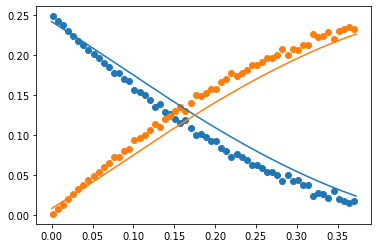

In [161]:
import numpy as np
from matplotlib import pyplot as plt

p1 = np.load('./Simulation_data/p1_0_inner_100.npy')
p2 = np.load('./Simulation_data/p2_0_inner_100.npy')
v1 = np.load('./Simulation_data/v1_0_inner_100_ran.npy')
v2 = np.load('./Simulation_data/v2_0_inner_100_ran.npy')
CB = np.load('./Simulation_data/CB_0_inner_100.npy')
CB = CB / 800.0
p1 = p1
p2 = p2
p1 = p1[np.argsort(CB)]
p2 = p2[np.argsort(CB)]
CB = CB[np.argsort(CB)]

inn = np.load('inn.npy')
out = np.load('out.npy')

xcb = np.arange(0,299,1)/800
plt.scatter(CB,p1)
plt.scatter(CB,p2)
plt.plot(xcb, inn)
plt.plot(xcb, out)

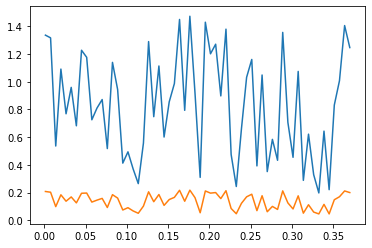

In [123]:
plt.plot(CB,v1)
plt.plot(CB,v2)
plt.show()

In [100]:
20/400


0.05